## The Machine Learning Project:-

Credit to: `Gloria Loyce Nankoma`

Reg.No: `2022/HD07/2048U`

Instructor: `Mugume Twinamatsiko Atwine`

### First Individual Project Assignment:-

You are a lead data scientist on a project regarding maternal health, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions
1 - Use that dataset to do: EDA, Clean the data
2 - Use mandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)
3 - Apply any needed transformations if possible.
4 - Choose a proper evaluation metric for your project.
5 - Do model spot checking to find the best model for your use.
6 - Build the chosen model
7 - Evaluate bias vs variance on your model and present your results.

Note:
- Please follow instructions!
- You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
- Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
- This is a graded individual assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
- All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 3rd - May - 2023
- All your assignments will be handed in by means of a pull request to my original repository.
- Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
- Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)

## Import Necessary Libraries and Data Sets.
We begin by importing necessary Libraries and Data sets. these will help us to run our analysis

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import ydata_profiling as pf
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import webbrowser 
import os 
# Algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.metrics import plot_precision_recall_curve
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer

In [2]:
# Load dataset
Fetal = read_csv('fetal_health.csv')
# Print the first 5 rows of the dataframe.
Fetal.head(100)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,148.0,0.000,0.000,0.000,0.000,0.0,0.0,58.0,0.5,7.0,...,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
96,148.0,0.000,0.000,0.000,0.000,0.0,0.0,63.0,0.4,30.0,...,121.0,156.0,3.0,1.0,150.0,149.0,151.0,1.0,1.0,2.0
97,148.0,0.000,0.001,0.000,0.001,0.0,0.0,60.0,0.5,49.0,...,78.0,161.0,3.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
98,148.0,0.000,0.001,0.000,0.001,0.0,0.0,61.0,0.5,39.0,...,130.0,161.0,2.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0


## Structure of the Dataset
This will give us descriptive statitics of our dataset

In [3]:
# Analyse statically insight of data
Fetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
#Summary of the dataframe
#prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
Fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Exploratary Data Analysis using Pandas Profiling.
This will generate a report that gives basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 
- This helps us to clean our data by identifying missing values, handling outliers and tranforming data types.
- It gives a summary statistics such as mean, median, mode, and standard deviation to help understand the distribution of the data.
- Through graphs, charts, etc, we are able to visualize the data and identify different patterns, trends, and outliers.
- EDA helps us to identify the strength of relationships between variables using correlation and regression analysis

## Checking for missing and Null values in our dataset

In [5]:
miss_values = Fetal.columns[Fetal.isnull().any()]
print(f"Missing values:\n{Fetal[miss_values].isnull().sum()}")

null_values = Fetal.columns[Fetal.isna().any()]
print(f"Null values:\n{Fetal[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [6]:
def missing (Fetal):
    missing_number = Fetal.isnull().sum().sort_values(ascending=False)
    missing_percent = (Fetal.isnull().sum()/Fetal.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(Fetal)

,Missing_Number,Missing_Percent
baseline value,0,0.0
accelerations,0,0.0
histogram_tendency,0,0.0
histogram_variance,0,0.0
histogram_median,0,0.0
histogram_mean,0,0.0
histogram_mode,0,0.0
histogram_number_of_zeroes,0,0.0
histogram_number_of_peaks,0,0.0
histogram_max,0,0.0


The above results indicate that there are no missing or null values in the data set

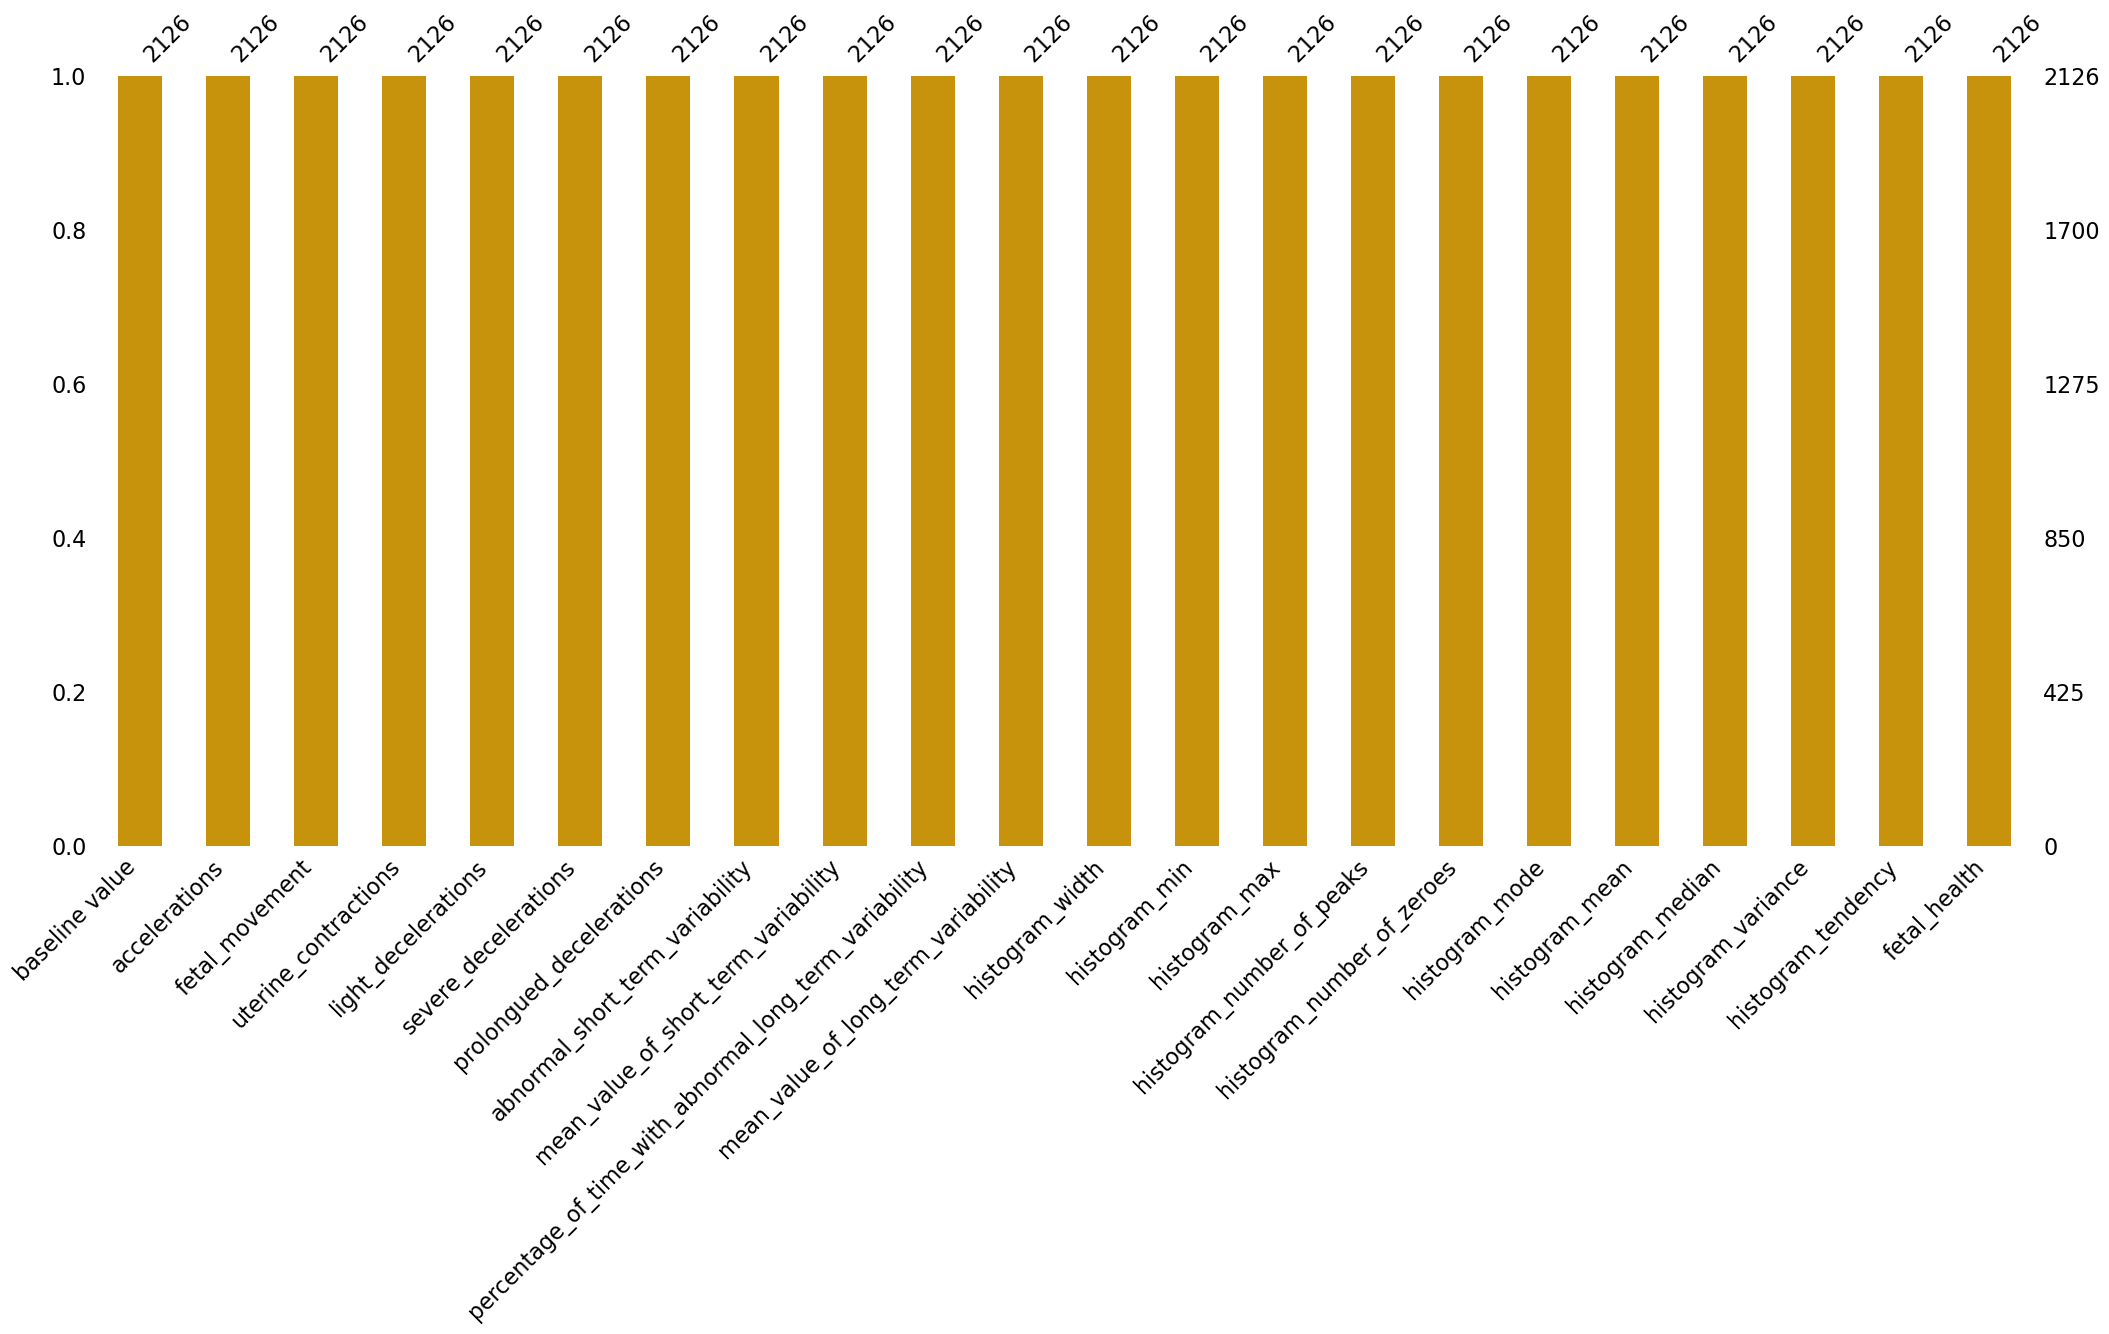

In [7]:
#visualizing for missing values
null_plot = msno.bar(Fetal, color = "#c7920c")

## Checking for Duplications

In [8]:
#checking for duplicates
Fetal.duplicated().sum()

13

The above results show that there are 13 duplicates in our dataset. there are two options:
1. Remove the duplicates which may not necessarily affect the data for we have a big data set of 2126 hence removing 13 wont really create a big impact.
2. Leave the duplicates within the dataset for there is a possibility that two individuals can have same results as per the variables thus ensuring all that is kept. 
i choose to leave and work with the duplicates. 

In [9]:
numerical= Fetal.drop(['fetal_health'], axis=1).select_dtypes('number').columns

categorical = Fetal.select_dtypes('object').columns

print(f'Numerical Columns:  {Fetal[numerical].columns}')
print('\n')
print(f'Categorical Columns: {Fetal[categorical].columns}')

Numerical Columns:  Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


- This indicates that we only have numerical data

In [10]:
profile = pf.ProfileReport(Fetal)
profile.to_file('fetal_Report.html') 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#profile

- The profile above indicates that the dataset has 19 numerical and 3 categorial variable out of 22 variables. there are no missing variables and the duplicates have been removed. most of the variables show  high correlation to the target(Fetal health) with severe deceleration showing high imbalance

### Data Description Summary:
- The data-set has 2126 rowa each with 22 features or columns
- There are no null values or missing values
- Much as there are many features with zero(0), there are normal records as per the data.
- Much as 13 duplicates were identified in the dataset which may seem a big deal, its possible that more than one fetal measurements may be similar. also given that these duplicates are actually few and with a fair distribution  of the fetal health, i found them worthy remaining in the dataset

## Correlation of the data

In [12]:
Fetal.corr(method='pearson')

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<AxesSubplot:>

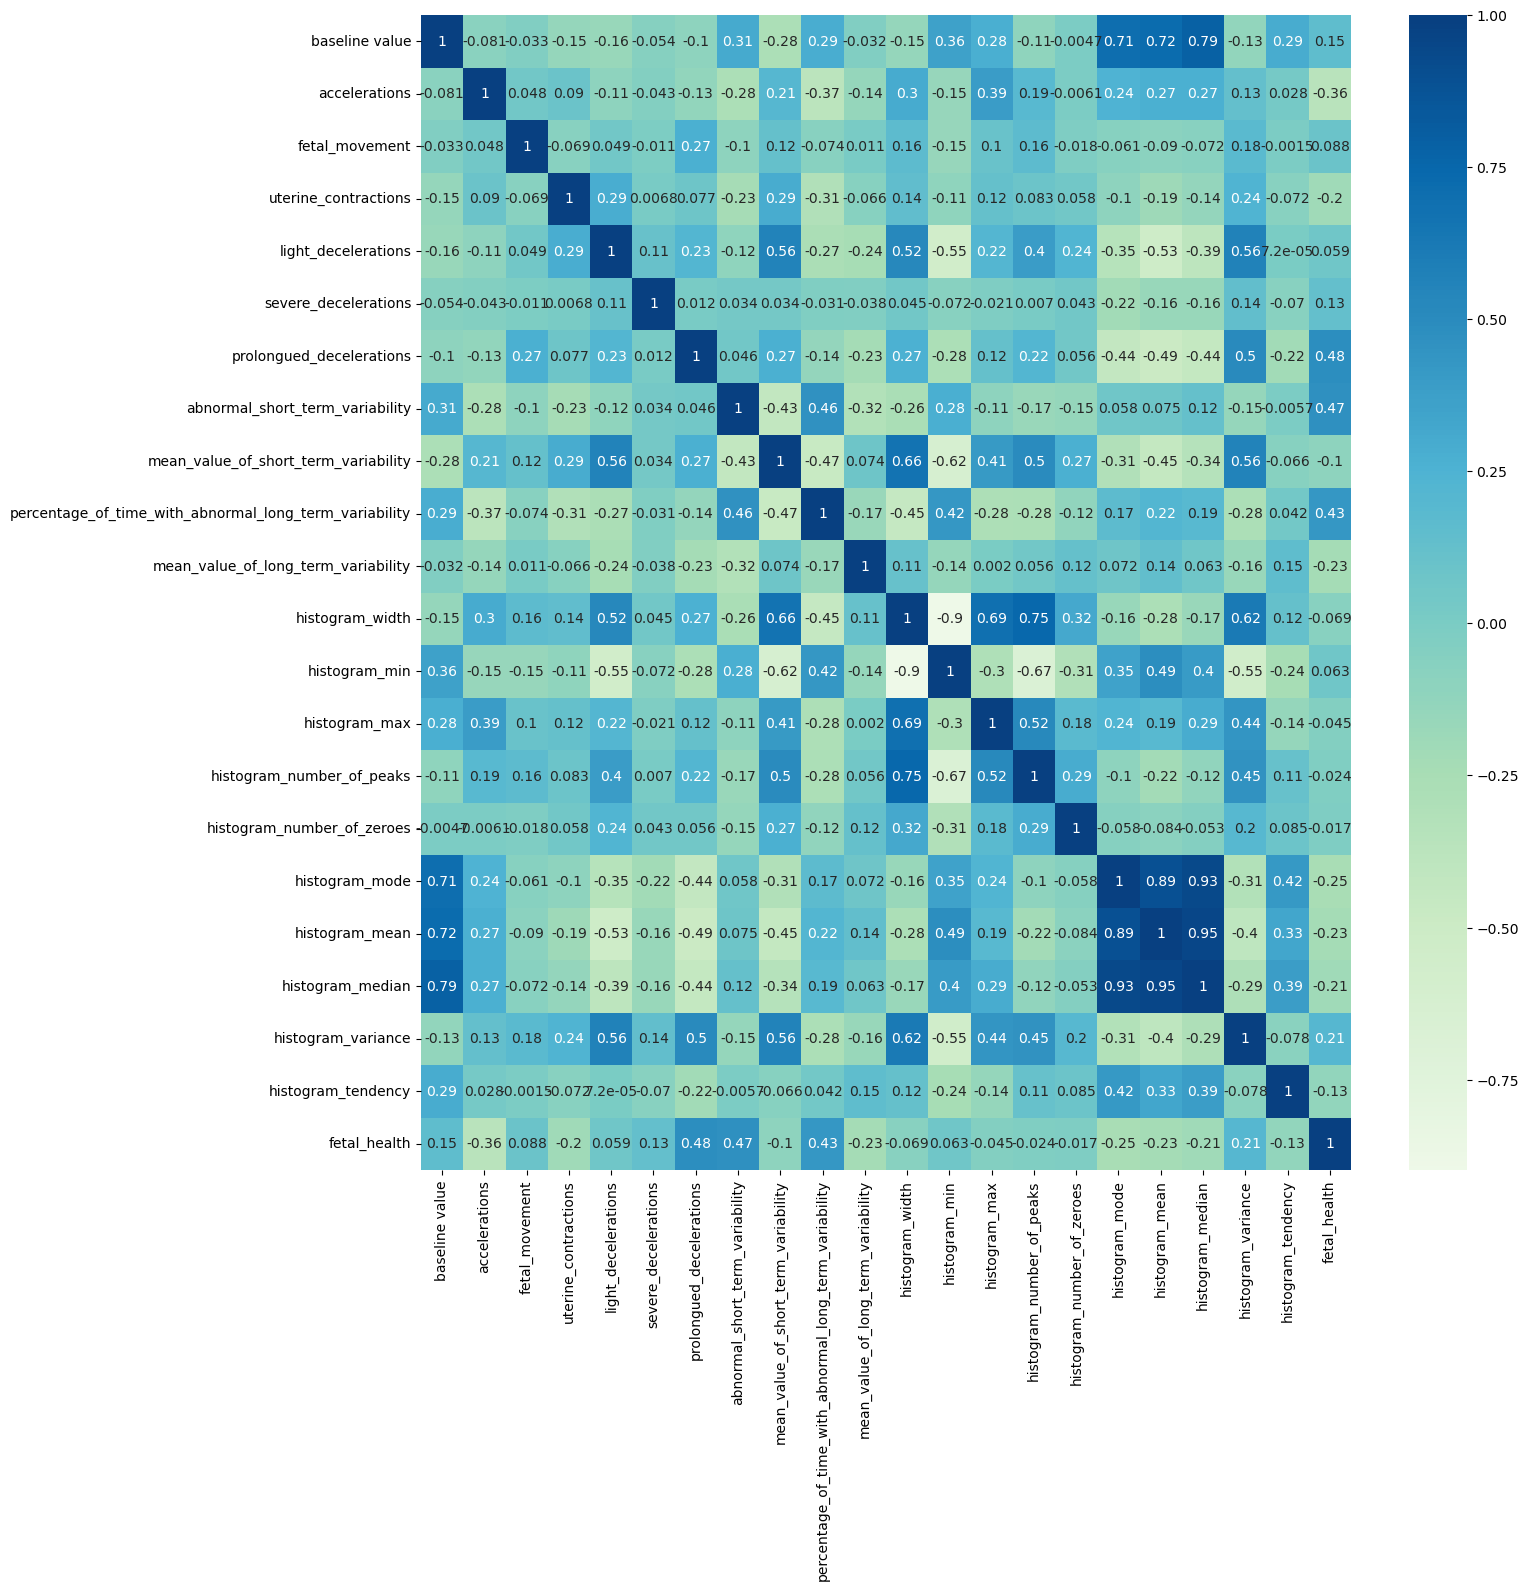

In [13]:
#plot a heat map to show us the correlation of the data
corrmat= Fetal.corr()
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap="GnBu", center=0)

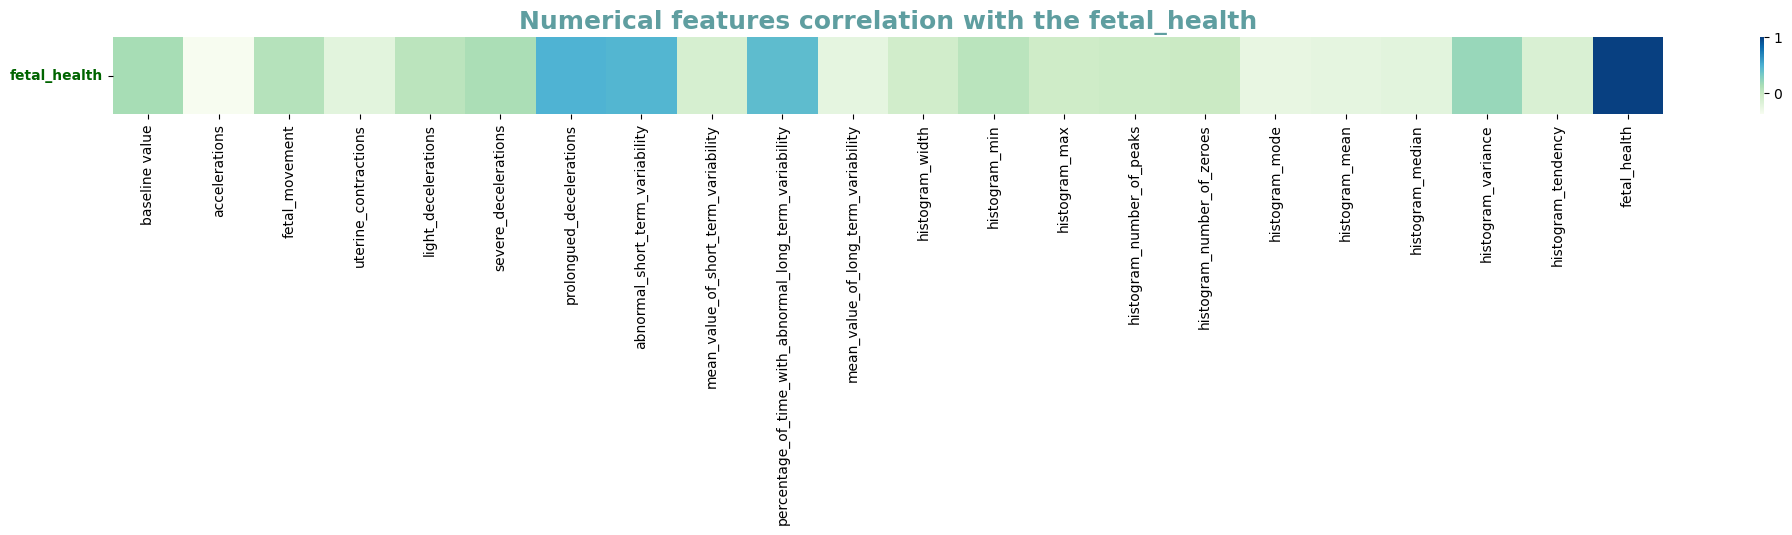

In [14]:
numeric_data = Fetal.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

- The above heatmap indicates that those with a more dark color have a higher correlation with the target variable which is fetal Health

In [15]:
features = corrmat["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = features.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


- From the above resultsProlonged decelerations shows the strongest correlation with fetal health wich is a correlation of 0.486. There are moderate correlations also observed between fetal health and percentage of time with abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.

- Three features: "prolongued_decelerations", "percentage_of_time_with_abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health).


### Analysizing and visualizing Fetal_health and its features

In [16]:
# checking value counts for fetal_health
Fetal.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

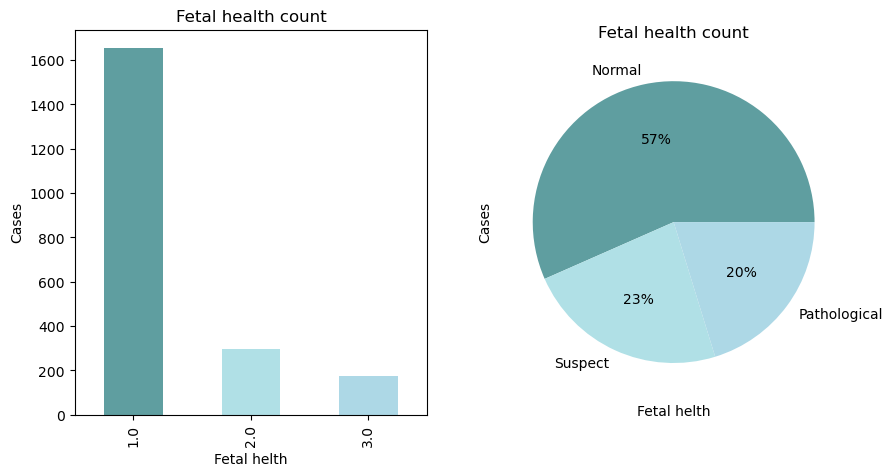

In [17]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
total = Fetal["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

plt.figure(figsize = (10,5))
plt.subplot(121)
vis_fetal_health = Fetal.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

- The graph above shows that  fetal health is very unbalanced. this is evident in that the majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.
- To make the data slightly easier to work with and understand, and turn this into a binary classification problem, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal.

### Comparing the different variables with fetal_health

### Prolonged Deceleration and Fetal_health

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

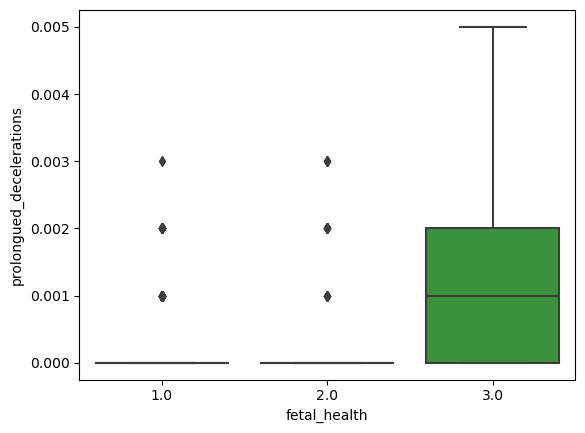

In [18]:
sns.boxplot(data = Fetal, x = 'fetal_health', y = 'prolongued_decelerations')

The above boxplot shows that  the median value of 'prolongued_decelerations' is  higher for the 'Pathological'(3.0) class compared to the other two classes, with some noticeable outliers in this class as well. The 'Normal'(1.0) and 'Suspect'(2.0) classes have lower median values and fewer outliers. Overall, we can observe some differences in the distribution of this feature across the different classes, which suggests it could be a useful feature for predicting the target variable.

### Abnormal Short Term Variability and Fetal Health

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

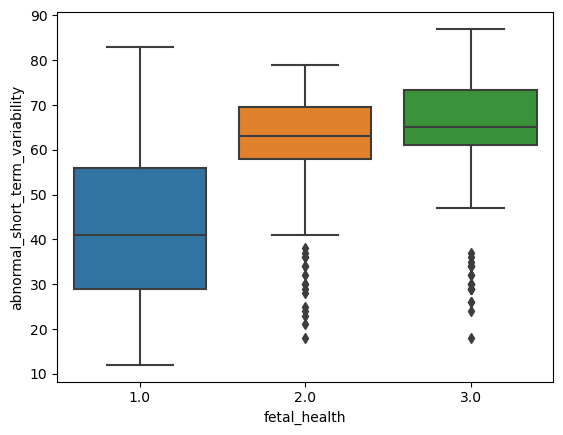

In [19]:
sns.boxplot(data = Fetal, x = 'fetal_health', y = 'abnormal_short_term_variability')

#### Data cleaning 

In [20]:
Fetal.fetal_health.unique()

array([2., 1., 3.])

### Scaling the data using standardization
Data scaling is done  to bring all the features of the dataset onto the same scale so that no feature dominates over the other. this is also because  most machine learning algorithms like linear regression, logistic regression, and k-nearest neighbors are based on the distance between data points and if features are not scaled properly, the algorithm may give less importance to certain features which may dominate the outcome and ignore other features that may be equally or more important which lead to inaccurate predictions and models that are biased towards certain features.

Therefore scaling helps us to ensure that all features contribute equally to the analysis, and the model can give more accurate predictions.

<AxesSubplot:>

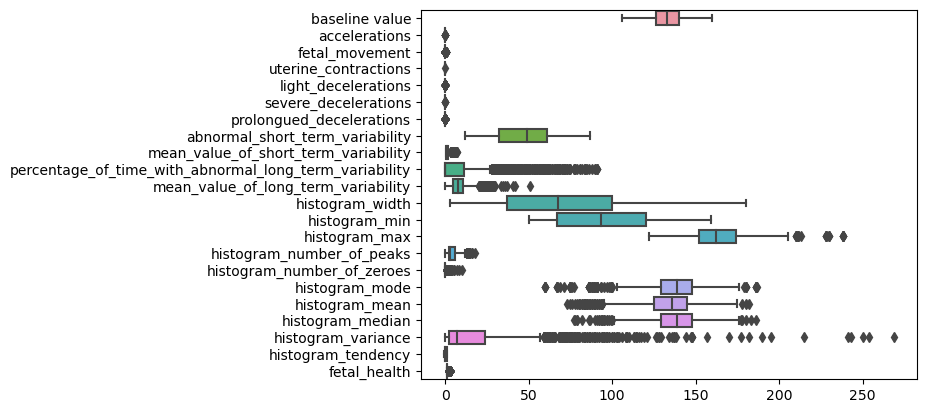

In [21]:
sns.boxplot(data = Fetal, orient = 'h')

The above plot shows us that the data isnt scaled

In [22]:
scaler = StandardScaler()

X = Fetal.drop(['fetal_health'], axis = 1)
y = Fetal['fetal_health']

scaled_X = scaler.fit_transform(X)

<AxesSubplot:>

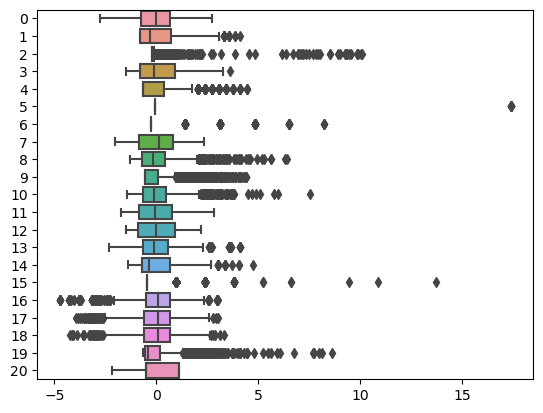

In [23]:
sns.boxplot(data = scaled_X, orient = 'h')

# MODEL TESTING & BUILDING

### Algorithm Spot Check - Testing and Training the Data Models

#### Logistic Regression:

In [25]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the logistic regression model on the training set
log_reg.fit(X_train, y_train)

# Calculate the training accuracy score
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
#print(f'Cross-Validation Accuracy Scores: {cv_scores}')
#print(f'Average Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.89
Test Set Accuracy Score: 0.88


### LinearDiscriminantAnalysis

In [26]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
lda = LinearDiscriminantAnalysis()

# Train the logistic regression model on the training set
lda.fit(X_train, y_train)

# Calculate the training accuracy score
y_train_pred = lda.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.89
Test Set Accuracy Score: 0.88


### KNeighborsClassifier

In [27]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNeighborsClassifier regression model
knnb = KNeighborsClassifier()

# Train the logistic regression model on the training set
knnb.fit(X_train, y_train)

# Calculate the training accuracy score
y_train_pred = knnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = knnb.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.92
Test Set Accuracy Score: 0.87


### DecisionTreeClassifier

In [28]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the DecisionTreeClassifier regression model
dt = DecisionTreeClassifier()

# Train the logistic regression model on the training set
dt.fit(X_train, y_train)

# Define the accuracy scorer for cross-validation
#accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation on the cross-validation set
#cv_scores = cross_val_score(dt, X_cv, y_cv, cv=5, scoring=accuracy_scorer)

# Calculate the training accuracy score
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 1.00
Test Set Accuracy Score: 0.92


### GaussianNB

In [29]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNeighborsClassifier regression model
gnb = GaussianNB()

# Train the logistic regression model on the training set
gnb.fit(X_train, y_train)

# Calculate the training accuracy score
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.82
Test Set Accuracy Score: 0.80


### SVC

In [30]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVC regression model
sc = SVC()

# Train the SVC model on the training set
sc.fit(X_train, y_train)

# Define the accuracy scorer for cross-validation
#accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation on the cross-validation set
#cv_scores = cross_val_score(sc, X_cv, y_cv, cv=5, scoring=accuracy_scorer)

# Calculate the training accuracy score
y_train_pred = sc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = sc.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
#print(f'Cross-Validation Accuracy Scores: {cv_scores}')
#print(f'Average Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.86
Test Set Accuracy Score: 0.86


### RandomForestClassifier

In [31]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestClassifier regression model
rf = RandomForestClassifier()

# Train the RandomForestClassifier model on the training set
rf.fit(X_train, y_train)


# Calculate the training accuracy score
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
#print(f'Cross-Validation Accuracy Scores: {cv_scores}')
#print(f'Average Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 1.00
Test Set Accuracy Score: 0.94


### GradientBoostingClassifier

In [32]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GradientBoostingClassifier regression model
gb = GradientBoostingClassifier()

# Train the GradientBoostingClassifier on the training set
gb.fit(X_train, y_train)

# Define the accuracy scorer for cross-validation
#accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation on the cross-validation set
#cv_scores = cross_val_score(gb, X_cv, y_cv, cv=5, scoring=accuracy_scorer)

# Calculate the training accuracy score
y_train_pred = gb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
#print(f'Cross-Validation Accuracy Scores: {cv_scores}')
#print(f'Average Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.99
Test Set Accuracy Score: 0.95


The results above show that the model predicted the outcome correctly for 99% of the data in the training set and the Test Set Acccuracy score is 0.95, which means that the model predicted the outcome correctly for 95% of the data in the test set

### AdaBoostClassifier

In [33]:
# Load the dataset
data = pd.read_csv('fetal_health.csv')

# Split the dataset into features (X) and target variable (y)
X = data.drop('fetal_health', axis=1)  
y = data['fetal_health']
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the AdaBoostClassifier regression model
ada = AdaBoostClassifier()

# Train the AdaBoostClassifier model on the training set
ada.fit(X_train, y_train)

# Define the accuracy scorer for cross-validation
#accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation on the cross-validation set
#cv_scores = cross_val_score(ada, X_cv, y_cv, cv=5, scoring=accuracy_scorer)

# Calculate the training accuracy score
y_train_pred = ada.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = ada.predict(X_test)

# Calculate the test set accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Training Set Accuracy Score: {train_accuracy:.2f}')
#print(f'Cross-Validation Accuracy Scores: {cv_scores}')
#print(f'Average Cross-Validation Accuracy Score: {np.mean(cv_scores):.2f}')
print(f'Test Set Accuracy Score: {accuracy:.2f}')

Training Set Accuracy Score: 0.91
Test Set Accuracy Score: 0.91


In [34]:
# Fit the models on training data and obtain accuracy scores on test data
models = [log_reg, lda, dt, knnb, rf, gb, ada, sc, gnb]
scores = []
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

# Create a dataframe to store the results
results = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Linear Discriminant Analysis",
              "Decision Tree Classifier",
              "K Nearest Neighbors Classifier",
              "Random Forest",
              "Gradient Boosting Classifier",
              "AdaBoost Classifier",
              "Support Vector Machine",
              "Gaussian Naive Bayes"],
    "Score": scores
})

# Sort the dataframe by score in descending order
result_df = results.sort_values(by="Score", ascending=False)

# Print the top 10 models
print(result_df)

                            Model     Score
4                   Random Forest  0.948357
5    Gradient Boosting Classifier  0.948357
2        Decision Tree Classifier  0.917840
6             AdaBoost Classifier  0.910798
1    Linear Discriminant Analysis  0.882629
0             Logistic Regression  0.880282
3  K Nearest Neighbors Classifier  0.873239
7          Support Vector Machine  0.856808
8            Gaussian Naive Bayes  0.802817


From the above testing and training of different models, Random Forest has the  highest test set accuracy 

('LR', 0.8909694270345684, 0.010647404589051291)
('LDA', 0.8756974694620727, 0.013388503471500857)
('KNN', 0.9024112370714782, 0.008835453301130565)
('CART', 0.9297047650701395, 0.017312155865108685)
('NB', 0.7645962669669374, 0.03816711901066739)
('SVM', 0.910737722645837, 0.015013837523231426)
('RF', 0.9425870021020518, 0.011695407927010704)
('GB', 0.9521947514625875, 0.010846106235247269)
('ADA', 0.8951453235701876, 0.01726337162036237)


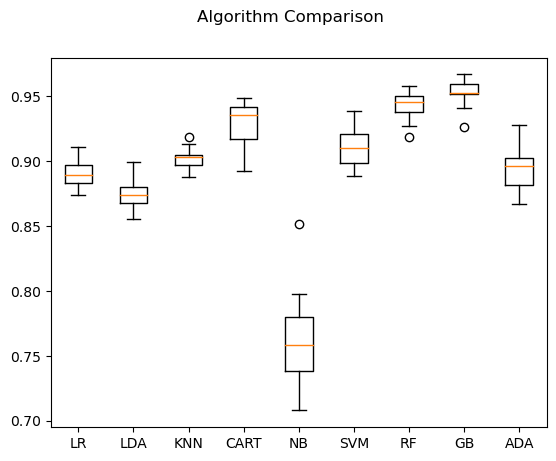

In [42]:
# Load dataset
filename = 'fetal_health.csv'
dataframe = read_csv(filename)
array = dataframe.values


# Split the dataset
X = array[:, 0:21]
Y = array[:, 21]
# Prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, scaled_X, y, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

These results above imply  that Gradient Boosting (GB) has the highest mean accuracy (0.9522) and the lowest standard deviation (0.0108), making it the best performing model in terms of both accuracy and consistency. However, Random Forest (RF) also performs well, with a mean accuracy of 0.9440 and a relatively low standard deviation of 0.0154.

### CHOSEN MODEL - GRADIENT BOOSTING

F1 Score: 0.91
Cross-Validation F1 Scores: [0.95294118 0.93529412 0.92647059 0.94705882 0.95882353]
Average Cross-Validation F1 Score: 0.94
Test Set F1 Score: 0.91
Confusion Matrix:
[[322   8   3]
 [ 10  53   1]
 [  1   0  28]]


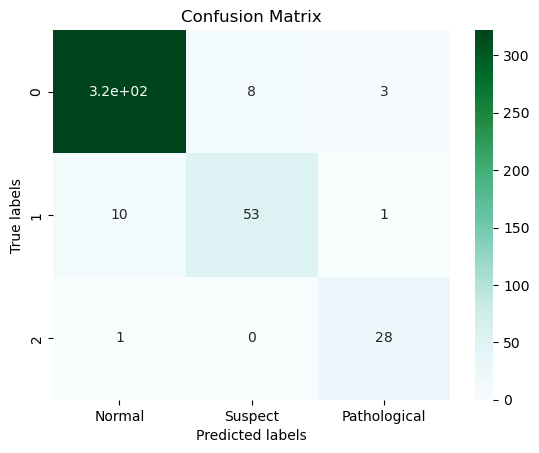

In [43]:
# Cross validate Random forest model
# Split the dataset into training (80%) and testing (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')

accuracy_scorer = make_scorer(accuracy_score)

# Define the F1 scorer for cross-validation (This doesnt work)
#f1_scorer = make_scorer(f1_score)

# Perform k-fold cross-validation (using 5 folds) to evaluate the model
cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring=accuracy_scorer)

print(f'F1 Score: {f1:.2f}')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Average Cross-Validation F1 Score: {np.mean(cv_scores):.2f}')
print(f'Test Set F1 Score: {f1:.2f}')

# Plot a confusion matrix for the random forest
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

The Test Set F1 Score of 0.91 is the score obtained on a previously unseen dataset, which indicates that the model has generalised well to new data.

The average Cross-Validation F1 Score of 0.93 shows that the model has performed consistently well across different subsets of the data

The Confusion Matrix shows that the model has correctly classified 326 instances of the first class, 53 instances of the second class, and 26 instances of the third class.

This signifies  that the model is performing well and generalizing to unseen data, as as a  result of the high average cross-validation F1 score. Though the test set F1 score is slightly lower than the average cross-validation F1 score, which may indicate some degree of overfitting or randomness in the test set.